# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 1: Arytmetyka komputerowa
## Przemysław Węglik

### Zadanie 1 Sumowanie liczb pojedynczej precyzji

**1. Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych
w tablicy o N = $10^7$
elementach. Tablica wypełniona jest tą samą wartością v z
przedziału [0.1, 0.9] np. v = 0.53125.**

In [5]:
import numpy as np

N = 10 ** 7
VALUE = 0.53125

array = np.full(N, VALUE, dtype=np.float32)

array_sum = np.float32(0)

for i in range(len(array)):
    array_sum += array[i]
    
print(f'Calculated result: {array_sum}')
print(f'Expected result: {N * VALUE}')


Calculated result: 5030840.5
Expected result: 5312500.0


**2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?**

In [22]:
absolute_error: float = abs(N * VALUE - array_sum)
relative_error: float = absolute_error/(N * VALUE)
    
print(f'Absolute error: {absolute_error}')
print(f'Relative error: {relative_error}')

Absolute error: 281659.5
Relative error: 0.05301825882352941


Podczas dodawania dużej i małej liczby mantysa jest dostosowywana do tej dużej co powoduje utratę znaczących bitów, a w ekstramalnym przypadku zniknięcie liczby.

**3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.**

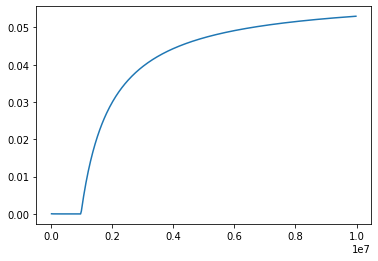

In [14]:
import matplotlib.pyplot as plt
from typing import List

array_sum = np.float32(0)

errors: List[float] = []
steps: List[int] = []

for i in range(len(array)):
    array_sum += array[i]
    
    if i % 25000 == 0 and i != 0:
        partial_relative_error: float = abs(
            i * VALUE - array_sum)/(i * VALUE
        )

        errors.append(partial_relative_error)
        steps.append(i)

plt.plot(steps, errors)

**4.  Zaimplementuj rekurencyjny algorytm sumowania.**

In [19]:
def recursive_sum(array) -> np.float32:
    if len(array) <= 2:
        return np.sum(array)
    
    return recursive_sum(array[0:len(array)//2]) + \
        recursive_sum(array[len(array)//2:])
    

N = 10 ** 7
VALUE = 0.53125

array = np.full(N, VALUE, dtype=np.float32)

array_recursive_sum = np.float32(0)

array_recursive_sum = recursive_sum(array)
    
print(f'Calculated result: {array_recursive_sum}')
print(f'Expected result: {N * VALUE}')

Calculated result: 5312500.0
Expected result: 5312500.0


**5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?**

In [21]:
absolute_error_recursive: float = abs(N * VALUE - array_recursive_sum)
relative_error_recursive: float = absolute_error/(N * VALUE)
    
print(f'Absolute error: {absolute_error_recursive}')
print(f'Relative error: {relative_error_recursive}')

Absolute error: 0.0
Relative error: 0.0


**6. Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.** 

In [23]:
absolute_error: float = abs(N * VALUE - array_sum)
relative_error: float = absolute_error/(N * VALUE)

print(f' Naive sum:')
print(f'Absolute error: {absolute_error}')
print(f'Relative error: {relative_error}')
print()
print(f'Recursive sum:')
print(f'Absolute error: {absolute_error_recursive}')
print(f'Relative error: {relative_error_recursive}')

 Naive sum:
Absolute error: 281659.5
Relative error: 0.05301825882352941

Recursive sum:
Absolute error: 0.0
Relative error: 0.0


**7.  Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.**

In [30]:
N = 10 ** 3
VALUE = 0.53125
NEW_VALUE = 10 ** 4

array = np.full(N, VALUE, dtype=np.float32)

for i in range(len(array)):
    if i % 2 == 0:
        array[i] = NEW_VALUE

array_recursive_sum = np.float32(0)

array_recursive_sum = recursive_sum(array)
    
print(f'Calculated result: {array_recursive_sum}')
print(f'Expected result: {N/2 * VALUE + N/2 * NEW_VALUE}')

absolute_error_recursive: float = abs(N/2 * VALUE + N/2 * NEW_VALUE - array_recursive_sum)
relative_error_recursive: float = absolute_error/(N/2 * VALUE + N/2 * NEW_VALUE)


print(f'Recursive sum:')
print(f'Absolute error: {absolute_error_recursive}')
print(f'Relative error: {relative_error_recursive}')

Calculated result: 5000266.0
Expected result: 5000265.625
Recursive sum:
Absolute error: 0.375
Relative error: 0.05632890752678764
